<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.475033,66.715400,51.489544,3.657993,219.337969,215.255582,4.082387
1,0.0,1.0,31.091283,87.830877,60.512343,-9.967401,179.467103,189.796370,-10.329267
2,0.0,2.0,41.673619,84.765264,60.369906,-11.386662,185.422127,197.017157,-11.595030
3,0.0,3.0,34.048050,21.730295,87.669256,2.818921,156.266521,152.030044,4.236478
4,0.0,4.0,68.782729,62.274988,57.094183,-4.890458,193.261443,197.717050,-4.455607
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,77.553445,21.504820,88.352726,2.257337,199.668328,196.263106,3.405222
249996,999.0,246.0,73.450426,84.105862,90.075440,1.867910,259.499639,257.936612,1.563027
249997,999.0,247.0,71.363747,61.993677,79.074206,-5.672793,216.758837,222.386576,-5.627739
249998,999.0,248.0,54.890410,61.979128,25.660933,-7.215730,145.314741,153.351804,-8.037063


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    87.475033  66.715400  51.489544   3.657993  219.337969   
      1.0    31.091283  87.830877  60.512343  -9.967401  179.467103   
      2.0    41.673619  84.765264  60.369906 -11.386662  185.422127   
      3.0    34.048050  21.730295  87.669256   2.818921  156.266521   
      4.0    68.782729  62.274988  57.094183  -4.890458  193.261443   
...                ...        ...        ...        ...         ...   
999.0 245.0  77.553445  21.504820  88.352726   2.257337  199.668328   
      246.0  73.450426  84.105862  90.075440   1.867910  259.499639   
      247.0  71.363747  61.993677  79.074206  -5.672793  216.758837   
      248.0  54.890410  61.979128  25.660933  -7.215730  145.314741   
      249.0  61.210919  99.533688  88.268787  -1.980893  257.032501   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    215.255582   4.082387  
      1.0    189.796370 -10.329267  
      2.0    197.017157 -11.595030  
      3.0    152.030044   4.236478  
      4.0    197.717050  -4.455607  
...                 ...        ...  
999.0 245.0  196.263106   3.405222  
      246.0  257.936612   1.563027  
      247.0  222.386576  -5.627739  
      248.0  153.351804  -8.037063  
      249.0  259.539433  -2.506932  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    87.475033  66.715400  51.489544   3.657993  219.337969   
      1.0    31.091283  87.830877  60.512343  -9.967401  179.467103   
      2.0    41.673619  84.765264  60.369906 -11.386662  185.422127   
      3.0    34.048050  21.730295  87.669256   2.818921  156.266521   
      4.0    68.782729  62.274988  57.094183  -4.890458  193.261443   
...                ...        ...        ...        ...         ...   
999.0 245.0  77.553445  21.504820  88.352726   2.257337  199.668328   
      246.0  73.450426  84.105862  90.075440   1.867910  259.499639   
      247.0  71.363747  61.993677  79.074206  -5.672793  216.758837   
      248.0  54.890410  61.979128  25.660933  -7.215730  145.314741   
      249.0  61.210919  99.533688  88.268787  -1.980893  257.032501   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    215.255582   4.082387  
      1.0    189.796370 -10.329267  
      2.0    197.017157 -11.595030  
      3.0    152.030044   4.236478  
      4.0    197.717050  -4.455607  
...                 ...        ...  
999.0 245.0  196.263106   3.405222  
      246.0  257.936612   1.563027  
      247.0  222.386576  -5.627739  
      248.0  153.351804  -8.037063  
      249.0  259.539433  -2.506932  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.475033,66.715400,51.489544,3.657993,219.337969,215.255582,4.082387
1,0.0,1.0,31.091283,87.830877,60.512343,-9.967401,179.467103,189.796370,-10.329267
2,0.0,2.0,41.673619,84.765264,60.369906,-11.386662,185.422127,197.017157,-11.595030
3,0.0,3.0,34.048050,21.730295,87.669256,2.818921,156.266521,152.030044,4.236478
4,0.0,4.0,68.782729,62.274988,57.094183,-4.890458,193.261443,197.717050,-4.455607
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,77.553445,21.504820,88.352726,2.257337,199.668328,196.263106,3.405222
249996,999.0,246.0,73.450426,84.105862,90.075440,1.867910,259.499639,257.936612,1.563027
249997,999.0,247.0,71.363747,61.993677,79.074206,-5.672793,216.758837,222.386576,-5.627739
249998,999.0,248.0,54.890410,61.979128,25.660933,-7.215730,145.314741,153.351804,-8.037063


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    87.475033  66.715400  51.489544   3.657993  219.337969   
      1.0    31.091283  87.830877  60.512343  -9.967401  179.467103   
      2.0    41.673619  84.765264  60.369906 -11.386662  185.422127   
      3.0    34.048050  21.730295  87.669256   2.818921  156.266521   
      4.0    68.782729  62.274988  57.094183  -4.890458  193.261443   
...                ...        ...        ...        ...         ...   
999.0 245.0  77.553445  21.504820  88.352726   2.257337  199.668328   
      246.0  73.450426  84.105862  90.075440   1.867910  259.499639   
      247.0  71.363747  61.993677  79.074206  -5.672793  216.758837   
      248.0  54.890410  61.979128  25.660933  -7.215730  145.314741   
      249.0  61.210919  99.533688  88.268787  -1.980893  257.032501   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    215.255582   4.082387  
      1.0    189.796370 -10.329267  
      2.0    197.017157 -11.595030  
      3.0    152.030044   4.236478  
      4.0    197.717050  -4.455607  
...                 ...        ...  
999.0 245.0  196.263106   3.405222  
      246.0  257.936612   1.563027  
      247.0  222.386576  -5.627739  
      248.0  153.351804  -8.037063  
      249.0  259.539433  -2.506932  

[250000 rows x 7 columns]

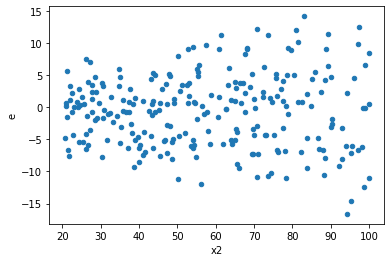

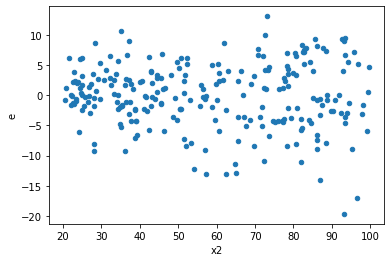

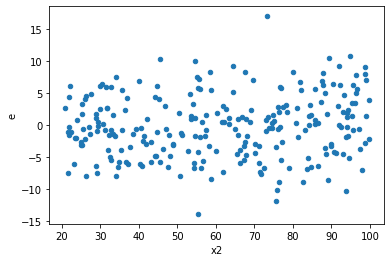

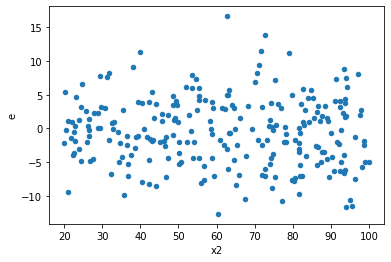

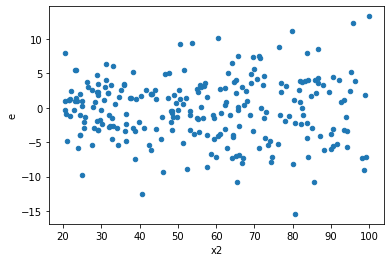

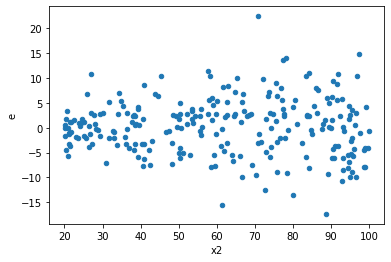

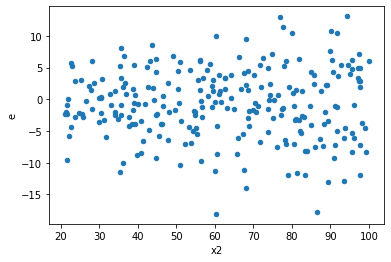

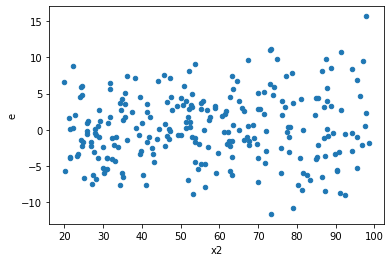

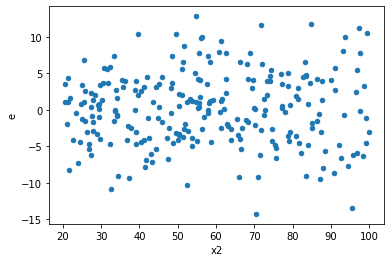

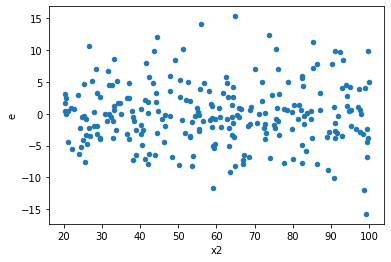

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,121.0,123.0,2786.5727005145045,3036.2179583807483,23.029526450533094,24.68469884862397,1.071871751320903,0.7017158817381275,0.6491420591309363,0.35085794086906374,Reject005=1 : Homoscedasticity
3.0,113.0,131.0,2501.5541561127925,4053.9838797603948,22.137647399228253,30.946441830232022,1.3979101424892535,0.06446965010729633,0.9677651749463518,0.032234825053648164,Reject005=1 : Homoscedasticity
4.0,123.0,121.0,3081.196540765052,3379.1891483260165,25.050378380203675,27.927183044016665,1.1148407668798495,0.5495737905714062,0.7252131047142969,0.2747868952857031,Reject005=1 : Homoscedasticity
6.0,118.0,126.0,2912.42849474042,3506.9986690946866,24.681597413054405,27.83332277059275,1.1276953555636298,0.5065644386162744,0.7467177806918628,0.2532822193081372,Reject005=1 : Homoscedasticity
10.0,117.0,127.0,3192.791747444865,4591.593575592577,27.288818354229615,36.15428012277619,1.3248752530602879,0.12064963231956449,0.9396751838402178,0.060324816159782246,Reject005=1 : Homoscedasticity
14.0,123.0,121.0,1789.471849315365,3343.481116721388,14.548551620450123,27.63207534480486,1.8993007734160923,0.000461268482029098,0.9997693657589855,0.000230634241014549,Reject005=0 : Heteroscedasticity
16.0,134.0,110.0,3410.989265699982,3830.3544101266384,25.45514377388046,34.82140372842399,1.3679515636503397,0.08908014650833063,0.9554599267458347,0.04454007325416531,Reject005=1 : Homoscedasticity
19.0,129.0,115.0,2909.214041614433,2683.0939181430417,22.55204683422041,23.331251462113407,1.0345513927680674,0.8545134540926984,0.5727432729536508,0.4272567270463492,Reject005=1 : Homoscedasticity
20.0,113.0,131.0,2835.5970521577196,4515.932240838629,25.093779222634687,34.47276519724144,1.373757411802957,0.07960361468932775,0.9601981926553361,0.039801807344663875,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,150.0,94.0,5294.674494224875,2056.036221677895,35.29782996149917,21.8727257625308,0.6196620524941138,0.008872762540750265,Reject005=0 : Heteroscedasticity
1.0,123.0,121.0,3756.52836551333,3392.5083508023763,30.540881020433577,28.0372590975403,0.9180239128917659,0.637026080413639,Reject005=1 : Homoscedasticity
2.0,121.0,123.0,2786.5727005145045,3036.2179583807483,23.029526450533094,24.68469884862397,1.071871751320903,0.7017158817381275,Reject005=1 : Homoscedasticity
3.0,113.0,131.0,2501.5541561127925,4053.9838797603948,22.137647399228253,30.946441830232022,1.3979101424892535,0.06446965010729633,Reject005=1 : Homoscedasticity
4.0,123.0,121.0,3081.196540765052,3379.1891483260165,25.050378380203675,27.927183044016665,1.1148407668798495,0.5495737905714062,Reject005=1 : Homoscedasticity
5.0,124.0,120.0,4119.922422814721,2495.0624599839243,33.22518082915098,20.792187166532702,0.6257960573171699,0.010006776493037018,Reject005=0 : Heteroscedasticity
6.0,118.0,126.0,2912.42849474042,3506.9986690946866,24.681597413054405,27.83332277059275,1.1276953555636298,0.5065644386162744,Reject005=1 : Homoscedasticity
7.0,115.0,129.0,3661.7312354972137,3345.7778007551674,31.84114117823664,25.936262021357887,0.8145518992606104,0.26188084292129926,Reject005=1 : Homoscedasticity
8.0,114.0,130.0,3118.3188820527616,2872.6672652115203,27.353674403971592,22.09744050162708,0.8078417610476003,0.24372021756723022,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      618
Reject005=0 : Heteroscedasticity    382
Name: Result_test, dtype: int64